In [1]:

import numpy as np 
import pandas as pd 
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import matplotlib.pyplot as plt
import sklearn as sk
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 3

Using TensorFlow backend.


In [2]:


btc = pd.read_csv('./input/bitcoin_price.csv')
eth = pd.read_csv('./input/ethereum_price.csv')
bch = pd.read_csv('./input/bitcoin_cash_price.csv')

dash=pd.read_csv('./input/dash_price.csv')
ethcls=pd.read_csv('./input/ethereum_classic_price.csv')
iota = pd.read_csv('./input/iota_price.csv')
litecoin = pd.read_csv('./input/litecoin_price.csv')
monero = pd.read_csv('./input/monero_price.csv')
nem = pd.read_csv('./input/nem_price.csv')
neo = pd.read_csv('./input/neo_price.csv')
numeraire = pd.read_csv('./input/numeraire_price.csv')
ripple = pd.read_csv('./input/ripple_price.csv')
stratis = pd.read_csv('./input/stratis_price.csv')
waves = pd.read_csv('./input/waves_price.csv')
waves.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Nov 07, 2017",3.52,3.72,3.42,3.69,"11,312,200","352,178,000"
1,"Nov 06, 2017",3.46,3.65,3.36,3.52,"12,291,000","345,746,000"
2,"Nov 05, 2017",3.61,3.62,3.39,3.45,"9,798,490","360,517,000"
3,"Nov 04, 2017",3.65,3.79,3.44,3.62,"11,619,500","365,254,000"
4,"Nov 03, 2017",3.21,3.97,3.02,3.68,"14,090,800","320,550,000"


In [4]:

btc = btc.iloc[::-1]
eth = eth.iloc[::-1]
bch = bch.iloc[::-1]
dash= dash.iloc[::-1]
ethcls= ethcls.iloc[::-1]
iota = iota.iloc[::-1]
litecoin = litecoin.iloc[::-1]
monero = monero.iloc[::-1]
nem = nem.iloc[::-1]
neo = neo.iloc[::-1]
numeraire = numeraire.iloc[::-1]
ripple = ripple.iloc[::-1]
stratis = stratis.iloc[::-1]
waves = waves.iloc[::-1]

btc.head()

,Date,Open,High,Low,Close,Volume,Market Cap
1654,"Apr 28, 2013",135.30,135.98,132.10,134.21,-,"1,500,520,000"
1653,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"
1652,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1651,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1650,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"


In [8]:
features = btc[["Open","High","Low","Close"]].values
print(features.shape)
price_variation = (1- (features[:,0]/features[:,3]))*100
highs = (features[:,1]/np.maximum(features[:,0],features[:,3]) -1)*100
lows = (features[:,2]/np.minimum(features[:,0],features[:,3]) -1)*100
X_train = np.array([price_variation , highs, lows]).transpose()
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

X_train,X_test = np.split(X_train,[int(.8*len(X_train))])
print(X_train[:2])
print(X_test[:2])
print('Xtest',len(X_test))
Y_train = np.array((np.sign((features[2:,3]/features[:-2,3]-1))+1)/2)
Y_train,Y_test = np.split(Y_train,[int(.8*len(Y_train))])
print('Ytest',len(Y_test))
print(Y_train[:10])

(1655, 4)
[[[-0.81216005]
  [ 0.50258684]
  [-1.57216303]]

 [[ 6.98768507]
  [ 2.04095752]
  [-0.32728355]]]
[[[ 1.28831289]
  [ 0.23458832]
  [ 0.        ]]

 [[-0.01153018]
  [ 1.00044834]
  [-0.33309419]]]
Xtest 331
Ytest 331
[ 1.  0.  0.  0.  1.  1.  0.  0.  1.  1.]


In [17]:
 

model = Sequential()
model.add(LSTM(100,input_shape = (None,1),return_sequences = True))
model.add(Dropout(0.1))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(50))
model.add(Dense(1))
model.add(Activation('relu'))

model.compile(loss="mse", optimizer="rmsprop")

In [18]:
#train the model
model.fit(X_train[:-2],Y_train, batch_size=512,epochs=500,validation_split=0.05)



Train on 1255 samples, validate on 67 samples
Epoch 1/500
1255/1255 [==============================] - 22s - loss: 0.5028 - val_loss: 0.4999
Epoch 2/500
1255/1255 [==============================] - 2s - loss: 0.4213 - val_loss: 0.4083
Epoch 3/500
1255/1255 [==============================] - 2s - loss: 0.3560 - val_loss: 0.3017
Epoch 4/500
1255/1255 [==============================] - 3s - loss: 0.2664 - val_loss: 0.2554
Epoch 5/500
1255/1255 [==============================] - 3s - loss: 0.2545 - val_loss: 0.2447
Epoch 6/500
1255/1255 [==============================] - 2s - loss: 0.2493 - val_loss: 0.2436
Epoch 7/500
1255/1255 [==============================] - 2s - loss: 0.2474 - val_loss: 0.2432
Epoch 8/500
1255/1255 [==============================] - 2s - loss: 0.2499 - val_loss: 0.2546
Epoch 9/500
1255/1255 [==============================] - 2s - loss: 0.2476 - val_loss: 0.2356
Epoch 10/500
1255/1255 [==============================] - 2s - loss: 0.2480 - val_loss: 0.2417
Epoch 11/500

1255/1255 [==============================] - 0s - loss: 0.2447 - val_loss: 0.2463
Epoch 172/500
1255/1255 [==============================] - 0s - loss: 0.2451 - val_loss: 0.2482
Epoch 173/500
1255/1255 [==============================] - 0s - loss: 0.2459 - val_loss: 0.2575
Epoch 174/500
1255/1255 [==============================] - 0s - loss: 0.2475 - val_loss: 0.2422
Epoch 175/500
1255/1255 [==============================] - 0s - loss: 0.2459 - val_loss: 0.2395
Epoch 176/500
1255/1255 [==============================] - 0s - loss: 0.2453 - val_loss: 0.2622
Epoch 177/500
1255/1255 [==============================] - 0s - loss: 0.2484 - val_loss: 0.2498
Epoch 178/500
1255/1255 [==============================] - 0s - loss: 0.2459 - val_loss: 0.2527
Epoch 179/500
1255/1255 [==============================] - 0s - loss: 0.2464 - val_loss: 0.2403
Epoch 180/500
1255/1255 [==============================] - 0s - loss: 0.2449 - val_loss: 0.2379
Epoch 181/500
1255/1255 [=============================

1255/1255 [==============================] - 0s - loss: 0.2438 - val_loss: 0.2415
Epoch 342/500
1255/1255 [==============================] - 0s - loss: 0.2433 - val_loss: 0.2425
Epoch 343/500
1255/1255 [==============================] - 0s - loss: 0.2447 - val_loss: 0.2458
Epoch 344/500
1255/1255 [==============================] - 0s - loss: 0.2434 - val_loss: 0.2426
Epoch 345/500
1255/1255 [==============================] - 0s - loss: 0.2448 - val_loss: 0.2466
Epoch 346/500
1255/1255 [==============================] - 0s - loss: 0.2438 - val_loss: 0.2443
Epoch 347/500
1255/1255 [==============================] - 0s - loss: 0.2452 - val_loss: 0.2486
Epoch 348/500
1255/1255 [==============================] - 0s - loss: 0.2441 - val_loss: 0.2422
Epoch 349/500
1255/1255 [==============================] - 0s - loss: 0.2442 - val_loss: 0.2396
Epoch 350/500
1255/1255 [==============================] - 0s - loss: 0.2438 - val_loss: 0.2413
Epoch 351/500
1255/1255 [=============================

In [19]:
model.evaluate(X_test,Y_test)
#model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
#score,acc=model.evaluate(X_test,Y_test)
#print('Score:',score)
#print('Accuracy',acc)

288/331 [=========================>....] - ETA: 0s

0.27601000585584839

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
pred = model.predict(X_test)

predicted = (np.sign(pred-0.45)+1)/2


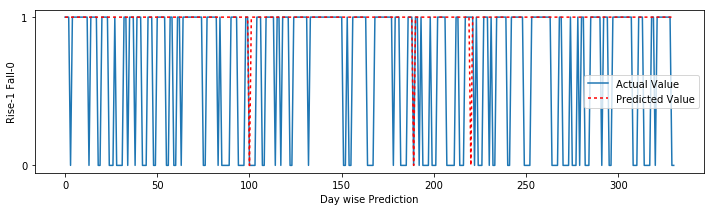

In [21]:

start =0
stop = len(X_test)
plt.plot(Y_test[start:stop],label='Actual Value')
plt.plot(predicted[start:stop],'r',dashes=[2,2,2,2],label='Predicted Value')#prediction is in red.
plt.plot(features[start:stop,3],'b')#actual in blue.
plt.ylabel("Rise-1 Fall-0")
plt.xlabel("Day wise Prediction")
plt.yticks([0,1])
plt.legend(loc='best')
plt.show(block='False')
plt.show()